<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Clustering</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Scale Features](#add)
2. [Define Perspectives](#add)
2. [Hierarchical](#add)
2. [K-Means](#add)
2. [Merging Perspectives](#add)
2. [](#add)

# Imports 

In [2]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

import warnings

In [3]:
from os.path import join

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone

In [12]:
from os.path import join

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('df2.csv')

In [5]:
df.head()

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,customer_city,total_orders,days_since_last_order,vendor_loyalty_score,cuisine_variety,available_cuisines_city,relative_cuisine_variety,average_spending,order_frequency,chain_consumption
0,0,-1.336914,-0.405124,-0.101535,-0.460631,-1.179582,-2.746186,-0.419982,-0.424012,-0.271954,...,-1.060623,-0.471133,-2.746186,-0.076298,-0.870670,1.151593,-1.080237,0.528089,22.754035,-0.329127
1,1,-1.478066,-0.405124,-0.531991,-0.209876,-1.179582,-2.746186,0.676943,-0.153769,-0.271954,...,1.338483,-0.471133,-2.746186,-0.076298,-0.195411,-1.281334,0.378789,-0.087778,22.754035,0.964013
2,2,1.486128,-0.765813,-0.531991,-0.209876,-1.179582,-2.746186,0.367203,-0.424012,-0.271954,...,-0.260921,-0.471133,-2.746186,1.472881,-0.870670,0.108910,-0.947598,-0.725299,22.754035,0.964013
3,3,-0.207697,-0.405124,-0.388506,-0.460631,-1.179582,-2.702571,-0.419982,0.155382,-0.271954,...,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,0.698774,10.938078,-0.329127
4,4,-1.054610,-0.405124,-0.101535,-0.711387,-1.179582,-2.702571,0.826679,1.304442,-0.271954,...,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,2.219652,10.938078,-1.622266


In [6]:
df.columns

Index(['Unnamed: 0', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'customer_city', 'total_orders', 'days_since_last_order',
       'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

In [7]:
# split data into metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

In [8]:
df_metric.columns

Index(['Unnamed: 0', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'customer_city', 'total_orders', 'days_since_last_order',
       'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

### Define Perspectives

- Preferential Perspective: vendor_loyalty_score, relative_cuisine_variety, chain_consumption
- Behavioural Perspective: first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [9]:
# preference features focus more on consumers' habits and preferences, reflecting their choices and inclinations
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']
# behavioural features focus more on customer behaviour patterns, such as purchasing tendencies, engament levels and habits
behavioural_features = ['first_order', 'days_since_last_order', 'order_frequency', 
                        'total_orders', 'total_amount_spent', 'average_spending']

df_prf = df[preferences_features].copy()
df_beh = df[behavioural_features].copy()

### K-Means

In [10]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 20
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=20
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

#### Optimal Clusterer on Preferences Variables

In [11]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_prf, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_prf, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_prf)

,kmeans,complete,average,single,ward
2,0.390796,0.276811,0.014629,0.249514,0.390018
3,0.609074,0.284097,0.402012,0.546738,0.560256
4,0.744545,0.556334,0.558732,0.547136,0.716976
5,0.833204,0.569964,0.722458,0.550718,0.827059
6,0.861960,0.675078,0.835293,0.563915,0.851013
7,0.883986,0.691866,0.852499,0.724661,0.872127
8,0.904931,0.710212,0.855504,0.735570,0.892635
9,0.918560,0.712272,0.877130,0.768722,0.908199


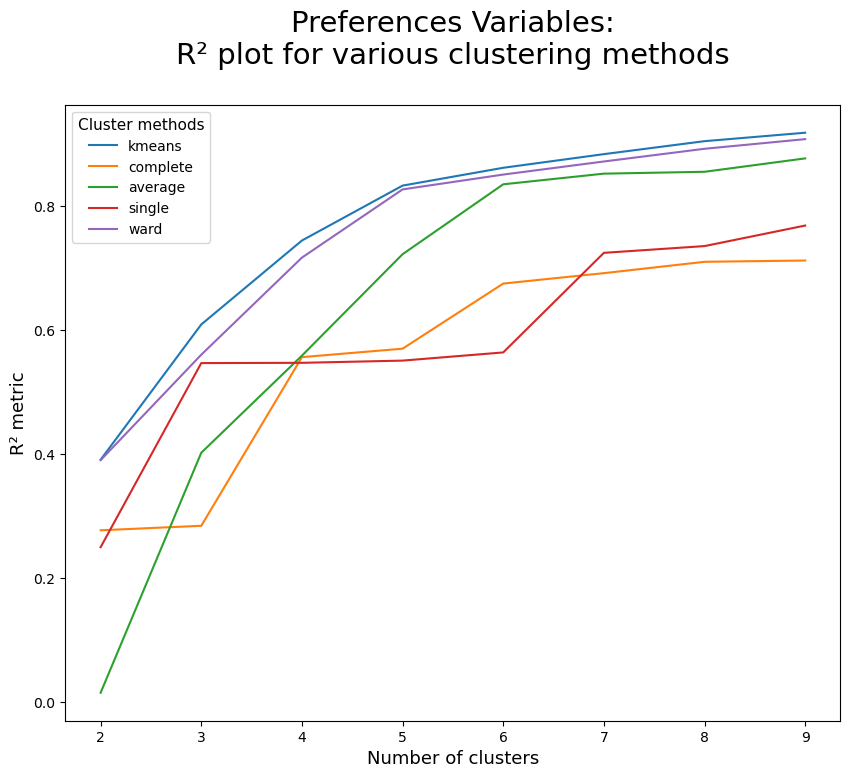

In [13]:
# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

- Since the graph indicates clearly that KMeans consistently achieves the highest R2 values, we decided to use it for our clusters.

### Preferential Perspective using KMeans

In [14]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [15]:
# fit method
kmclust_prf.fit(df[preferences_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [16]:
kmclust_prf.predict(df[preferences_features])

array([5, 3, 8, ..., 2, 8, 8], dtype=int32)

In [17]:
pd.DataFrame(kmclust_prf.transform(df[preferences_features]))

,0,1,2,3,4,5,6,7,8
0,4.022411,1.367998,2.033408,1.804468,2.120145,0.885108,1.487500,2.775867,2.025730
1,2.865802,0.970858,3.248094,0.677020,1.951546,1.407177,2.581991,1.477011,2.010691
2,4.718095,1.716751,2.588948,2.489997,3.418185,2.258385,3.128339,3.470302,0.044622
3,3.268587,1.309084,2.090432,1.329078,1.443601,0.187290,1.223866,2.103707,2.110638
4,3.589768,2.581752,1.642466,2.478951,1.631651,1.333577,0.213024,2.872008,3.077568
...,...,...,...,...,...,...,...,...,...
31396,4.823319,1.749710,2.598351,2.556624,3.489097,2.304993,3.161267,3.560563,0.177261
31397,4.823319,1.749710,2.598351,2.556624,3.489097,2.304993,3.161267,3.560563,0.177261
31398,4.829239,3.083228,0.117536,3.407809,3.081585,2.289670,1.880732,4.042805,2.586664
31399,4.718095,1.716751,2.588948,2.489997,3.418185,2.258385,3.128339,3.470302,0.044622


In [18]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_prf.fit(df[preferences_features])

KMeans(n_init=15, random_state=1)

In [19]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [20]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    inertia_prf.append(kmclust_prf.inertia_) 

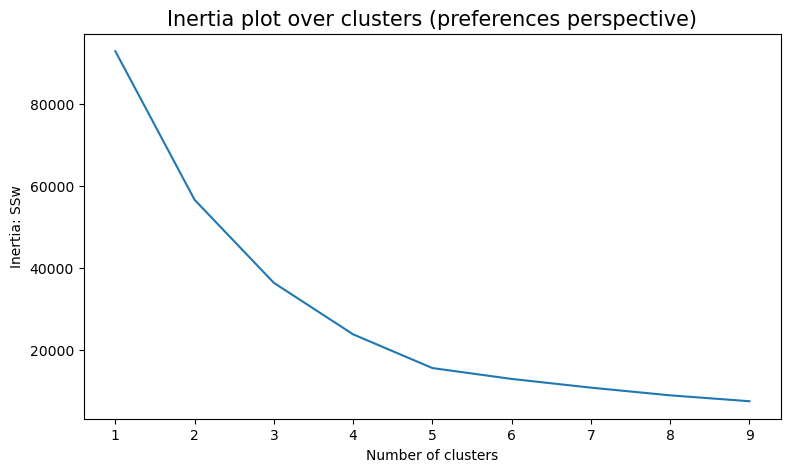

In [21]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

In [22]:
warnings.filterwarnings("ignore")

# Compute TSS (Total Sum of Squares)
tss = np.sum((df[preferences_features] - df[preferences_features].mean())**2).sum()

# List to store R² scores for 3, 4, and 5 clusters
r2_scores = []

# Evaluate R² for 3, 4, and 5 clusters
for n_clusters in [3, 4, 5]:
    kmclust_prf = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    wss_k = kmclust_prf.inertia_  # WSS for the current number of clusters
    r2 = 1 - (wss_k / tss)  # Calculate R²
    r2_scores.append((n_clusters, r2))

# Display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 3 clusters: 0.6091
R² score for 4 clusters: 0.7445
R² score for 5 clusters: 0.8332


- From this Elbow plot, we can observe that the optimal number of clusters for the preferences perspective is 3, as this is the point where the rate of decrease in within-cluster sum of squares (WSS) significantly slows down.

In [23]:
# storing average silhouette metric
avg_silhouette_prf = []
# iterate over the desired range of cluster numbers
for nclus_prf in range_clusters_prf:
    # skip n_clusters == 1 since silhouette scores are undefined for one cluster
    if nclus_prf == 1:
        continue

    # initialize the KMeans object with n_clusters value and a random generator
    kmclust_prf = KMeans(n_clusters=nclus_prf, init='k-means++', n_init=15, random_state=1)
    cluster_labels_prf = kmclust_prf.fit_predict(df[preferences_features])

    # the silhouette_score gives the average value for all the samples
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_prf = silhouette_score(df[preferences_features], cluster_labels_prf)
    avg_silhouette_prf.append(silhouette_avg_prf)

    print(f"For n_clusters = {nclus_prf}, the average silhouette_score is : {silhouette_avg_prf}")

For n_clusters = 2, the average silhouette_score is : 0.4274453966591505
For n_clusters = 3, the average silhouette_score is : 0.4246163263677979
For n_clusters = 4, the average silhouette_score is : 0.488097449179972
For n_clusters = 5, the average silhouette_score is : 0.5409267132199748
For n_clusters = 6, the average silhouette_score is : 0.512543185250648
For n_clusters = 7, the average silhouette_score is : 0.522336674207284
For n_clusters = 8, the average silhouette_score is : 0.5363671771271328
For n_clusters = 9, the average silhouette_score is : 0.5394352224193847


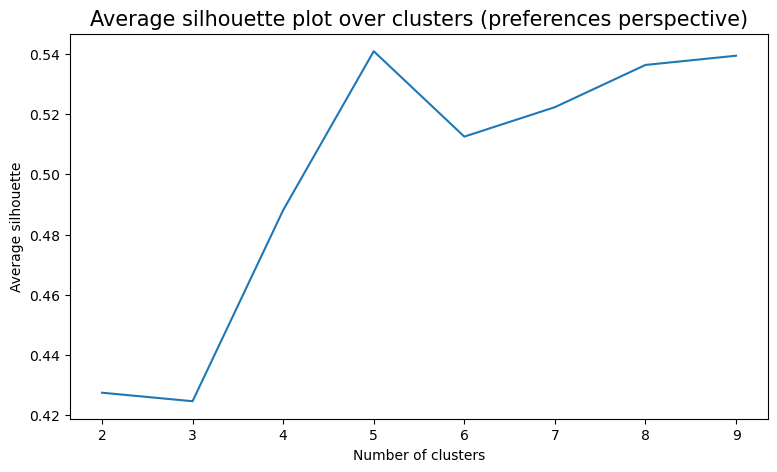

In [24]:
# average silhouette plot for preferential perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_prf[1:], # X-axis; 
         avg_silhouette_prf)     # Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (preferences perspective)", size=15)
plt.show()

- From the Silhouette plot, for the preferences perspective, the optimal number of clusters is 5, as this is the point where the average silhouette score reaches its peak. 

In [25]:
# final cluster solution of the preferential perspective
number_clusters_prf = 5
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=1)
km_labels_prf = kmclust_prf.fit_predict(df[preferences_features])
km_labels_prf

array([0, 2, 1, ..., 3, 1, 1], dtype=int32)

In [26]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((df[preferences_features], pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,vendor_loyalty_score,relative_cuisine_variety,chain_consumption
labels,,,
0,-0.361880,-0.053876,-0.858886
1,1.472881,-0.902976,0.964013
2,-0.463067,-0.149384,0.756268
3,1.472881,-0.830063,-1.622266
4,-1.083398,1.730392,0.068671


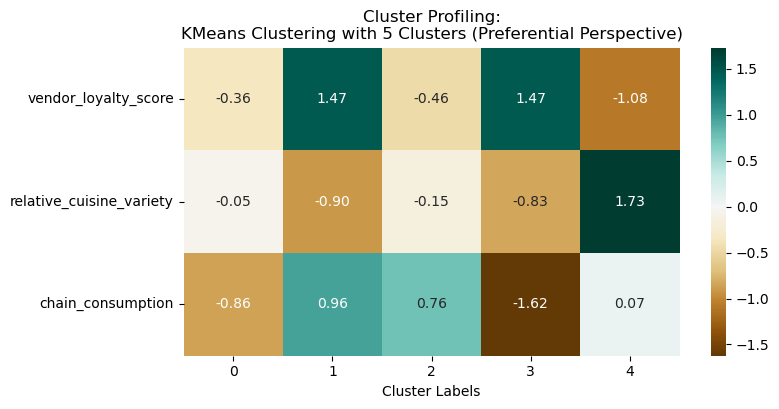

In [27]:
# add the cluster labels to the original data for profiling
df_with_labels_prf = df[preferences_features].copy()
df_with_labels_prf['Cluster Labels'] = km_labels_prf

# compute the cluster profile
km_profile_prf = df_with_labels_prf.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_prf,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters (Preferential Perspective)")
plt.show()

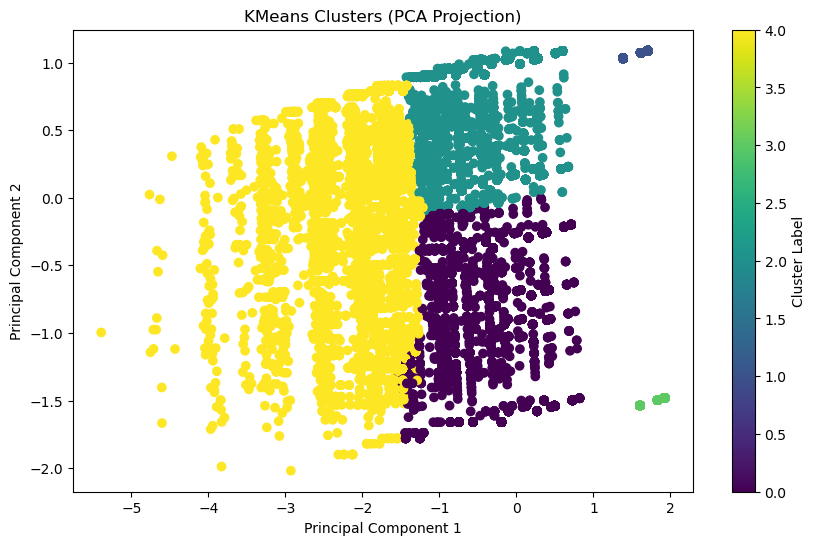

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[preferences_features])

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=km_labels_prf, cmap='viridis', marker='o')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show a colorbar to indicate cluster colors
plt.colorbar(label='Cluster Label')
plt.show()

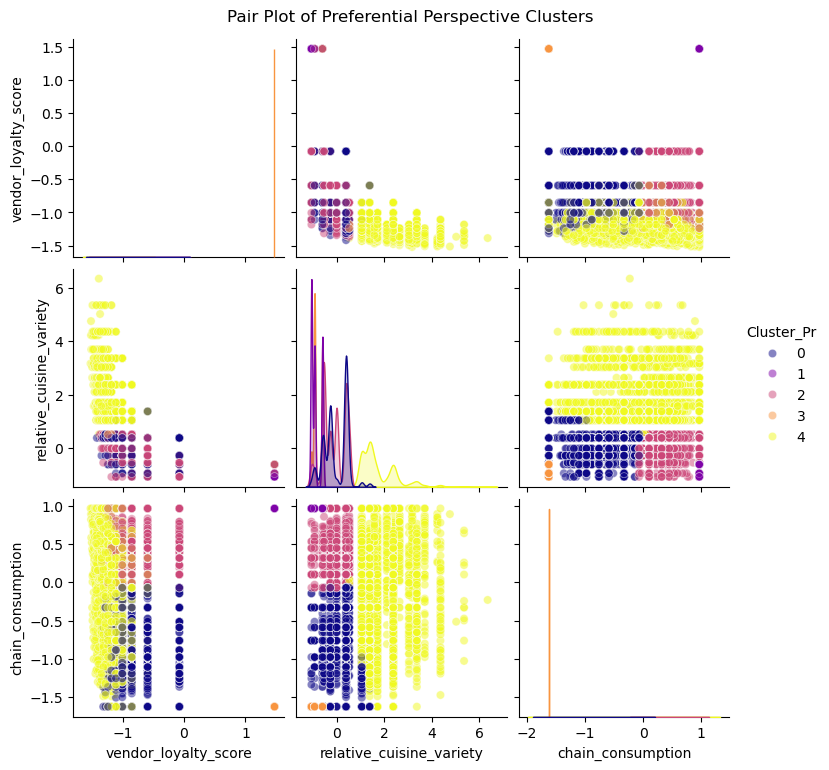

In [29]:
# add the cluster labels to the DataFrame
df['Cluster_Pr'] = km_labels_prf

# select a subset of features for the pair plot, including the cluster label
features_to_plot_prf = preferences_features
features_to_plot_prf.append('Cluster_Pr')

# create a DataFrame for plotting
plot_df_prf = df[features_to_plot_prf]

sns.pairplot(plot_df_prf, hue='Cluster_Pr', palette='plasma', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Preferential Perspective Clusters', y=1.02)
plt.show()

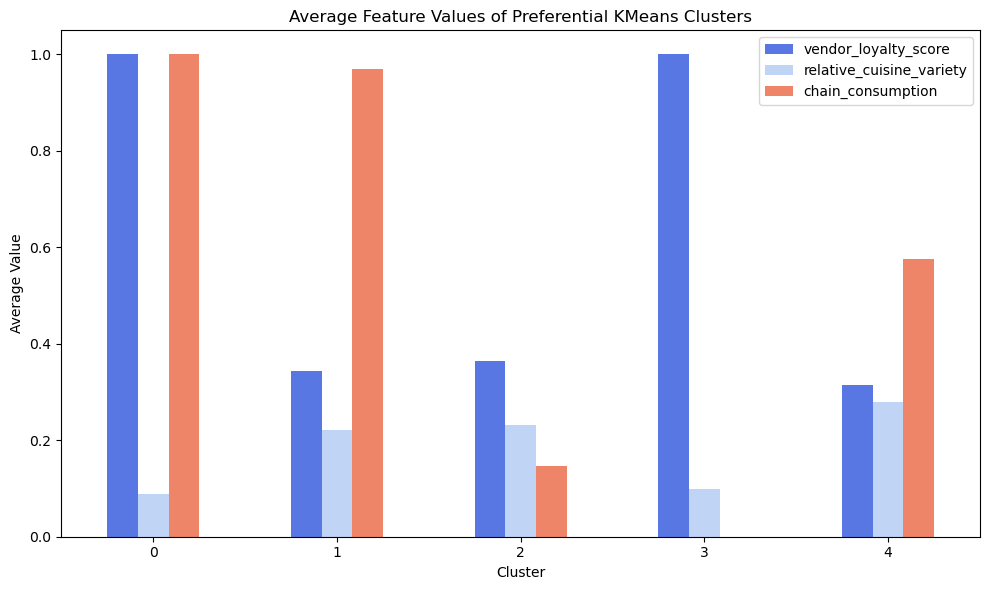

In [32]:
# Add KMeans cluster labels to the DataFrame
df_prf['km_labels_prf'] = km_labels_prf

# Specify the features to plot
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# Group by 'km_cluster' and compute the mean
cluster_means = df_prf[preferences_features + ['km_labels_prf']].groupby('km_labels_prf').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.1)
relative_cuisine_variet_color = cmap(0.4)
chain_consumption_color = cmap(0.8)

colors = [vendor_loyalty_score_color, relative_cuisine_variet_color, chain_consumption_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preferential KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Optimal Clusterer on Behavioural Variables

In [48]:
# obtain the R² scores for each cluster solution on behavioural variables
r2_scores_beh = {}
r2_scores_beh['kmeans'] = get_r2_scores(df_beh, kmeans, min_k=2, max_k=9)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_beh[linkage] = get_r2_scores(
        df_beh, hierarchical.set_params(linkage=linkage),
        min_k=2, max_k=9
    )

pd.DataFrame(r2_scores_beh)

,kmeans,complete,average,single,ward
2,0.397645,0.160723,0.073063,0.010818,0.346299
3,0.546493,0.165639,0.074867,0.011090,0.500037
4,0.670454,0.434348,0.385555,0.019244,0.642747
5,0.750562,0.437910,0.410271,0.019765,0.711135
6,0.786825,0.451300,0.412765,0.020077,0.751663
7,0.809059,0.572002,0.412901,0.022422,0.778669
8,0.828069,0.584167,0.413010,0.023501,0.799871
9,0.842355,0.595329,0.413567,0.023695,0.812398


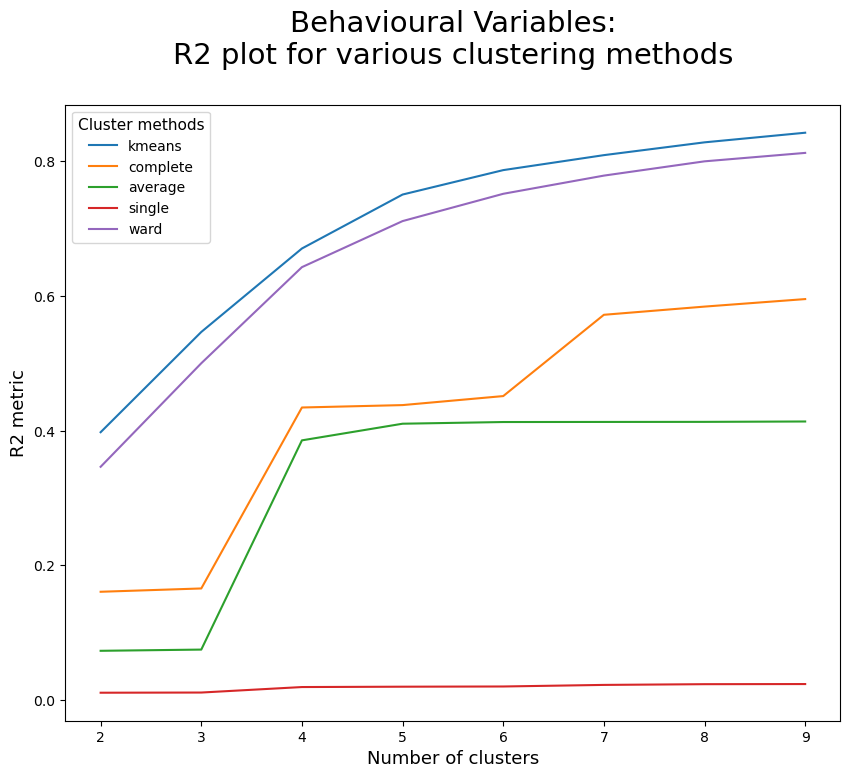

In [49]:
# visualizing the R² scores for each cluster solution on behavioural variables
pd.DataFrame(r2_scores_beh).plot.line(figsize=(10,8))

plt.title("Behavioural Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

- We chose to use KMeans for our clusters because the graph clearly shows that it consistently achieves the highest R² values.

### Behavioural Perspective using KMeans

In [50]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_beh = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [51]:
# fit method
kmclust_beh.fit(df[behavioural_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [52]:
kmclust_beh.predict(df[behavioural_features])

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [53]:
pd.DataFrame(kmclust_beh.transform(df[behavioural_features]))

,0,1,2,3,4,5,6,7,8
0,51.689988,103.393684,26.075461,109.823575,301.122991,81.181214,67.383715,171.091001,83.282717
1,51.354672,103.012092,23.074019,116.821912,310.482876,80.731050,66.099776,179.697052,87.232581
2,53.364604,103.808501,25.018997,124.641550,320.268169,81.782018,66.618434,188.844702,92.482226
3,51.198115,102.943001,26.907594,107.266869,298.263541,80.578440,67.276977,168.262563,81.473278
4,62.193551,109.330825,47.431847,93.545063,275.655291,88.511824,78.172173,148.386660,78.333421
...,...,...,...,...,...,...,...,...,...
31504,90.191471,31.429393,104.209015,129.182164,327.324625,75.533119,62.076268,194.770035,93.311057
31505,90.156676,31.330553,104.183112,129.083736,327.213335,75.495604,62.036060,194.662543,93.231805
31506,88.458512,26.310053,103.540303,112.488946,306.400560,74.257808,61.594112,175.221907,82.109969
31507,88.290475,25.724937,103.352805,113.236389,307.475999,74.014902,61.243925,176.186874,82.465307


In [54]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs 
kmclust_beh = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_beh.fit(df[behavioural_features])

KMeans(n_init=15, random_state=1)

In [55]:
# cluster range for behavioural perspective
range_clusters_beh = range(1, 10)

In [56]:
# empty list to store the inertia values for each number of clusters
inertia_beh = []
for n_clus_beh in range_clusters_beh:  # iterate over desired ncluster range
    kmclust_beh = KMeans(n_clusters=n_clus_beh, init='k-means++', n_init=15, random_state=1)
    kmclust_beh.fit(df[behavioural_features])
    inertia_beh.append(kmclust_beh.inertia_)

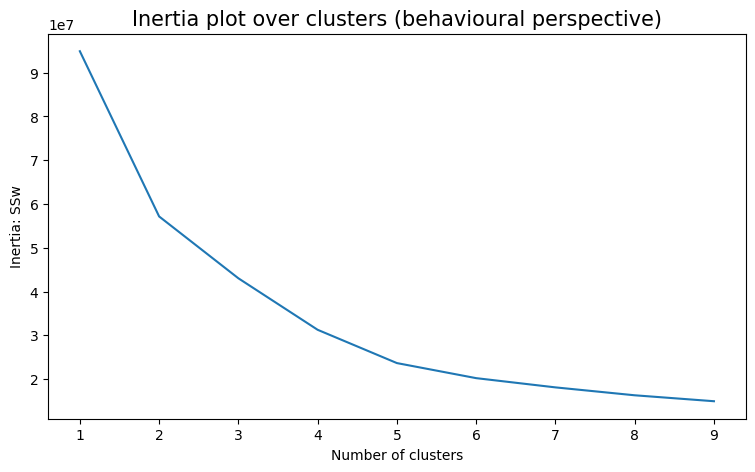

In [57]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_beh, inertia_beh)
ax.set_xticks(range_clusters_beh)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (behavioural perspective)", size=15)

plt.show()

- Since we were uncertain whether the optimal number of clusters was 3, 4, or 6, we calculated the R² score for all cluster values, though we focused on the results for these three.

In [58]:
warnings.filterwarnings("ignore")

# compute TSS (Total Sum of Squares)
tss = np.sum((df[behavioural_features] - df[behavioural_features].mean())**2).sum()

# list to store R² scores for all the clusters
r2_scores = []

# evaluate R² 
for n_clusters in [2, 3, 4, 5, 6, 7, 8, 9]:
    kmclust_beh = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=1)
    kmclust_beh.fit(df[behavioural_features])
    wss_k = kmclust_beh.inertia_ 
    r2 = 1 - (wss_k / tss) 
    r2_scores.append((n_clusters, r2))

# Display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 2 clusters: 0.3976
R² score for 3 clusters: 0.5465
R² score for 4 clusters: 0.6704
R² score for 5 clusters: 0.7506
R² score for 6 clusters: 0.7868
R² score for 7 clusters: 0.8090
R² score for 8 clusters: 0.8281
R² score for 9 clusters: 0.8424


- From the values, we can conclude that the optimal number of clusters for the behavioural perspective is 6, since the R² score reaches its highest value on that point, amount the previous three described.

In [59]:
# storing average silhouette metric
avg_silhouette_beh = []

# iterate over the desired range of cluster numbers
for nclus_beh in range_clusters_beh:
    # skip n_clusters == 1 since silhouette scores are undefined for one cluster
    if nclus_beh == 1:
        continue

    # initialize the KMeans object with n_clusters value and a random generator
    kmclust_beh = KMeans(n_clusters=nclus_beh, init='k-means++', n_init=15, random_state=1)
    cluster_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])
    
    # the silhouette_score gives the average value for all the samples
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_beh = silhouette_score(df[behavioural_features], cluster_labels_beh)
    avg_silhouette_beh.append(silhouette_avg_beh)

    print(f"For n_clusters = {nclus_beh}, the average silhouette_score is : {silhouette_avg_beh}")

For n_clusters = 2, the average silhouette_score is : 0.5268071595173277
For n_clusters = 3, the average silhouette_score is : 0.31366300457593116
For n_clusters = 4, the average silhouette_score is : 0.3625110662841437
For n_clusters = 5, the average silhouette_score is : 0.37183003647526286
For n_clusters = 6, the average silhouette_score is : 0.35907701317020296
For n_clusters = 7, the average silhouette_score is : 0.3232867967369475
For n_clusters = 8, the average silhouette_score is : 0.31424520807853856
For n_clusters = 9, the average silhouette_score is : 0.31713685694004307


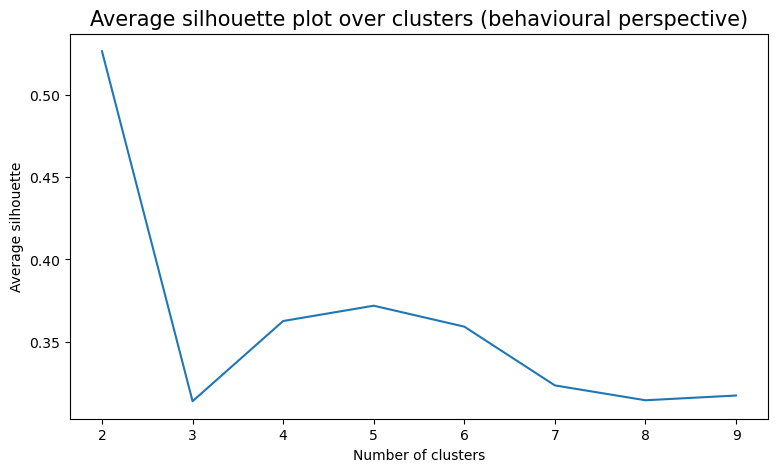

In [60]:
# average silhouette plot for the behavioural perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_beh[1:], # X-axis
         avg_silhouette_beh)     #  Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (behavioural perspective)", size=15)
plt.show()

- Based on the Silhouette plot for the behavioral perspective, the optimal number of clusters is 2, as this is where the average silhouette score is at its highest.

In [61]:
# silhouette scores from your output (for 2 to 9 clusters)
silhouette_scores = [0.3354, 0.2744, 0.2837, 0.3008, 0.3081, 0.2832, 0.2601, 0.2661]

# updated R² scores for 1 to 9 clusters
r2_scores = [-0.0000, 0.2234, 0.3784, 0.4927, 0.5682, 0.6295, 0.6628, 0.6874, 0.7116]

# normalize both metrics to [0, 1]
silhouette_scaler = MinMaxScaler()
r2_scaler = MinMaxScaler()

# normalize silhouette scores
silhouette_normalized = silhouette_scaler.fit_transform(np.array(silhouette_scores).reshape(-1, 1)).flatten()

# normalize R² scores
r2_normalized = r2_scaler.fit_transform(np.array(r2_scores[1:]).reshape(-1, 1)).flatten()

# combine scores with equal weight
alpha = 0.5  # adjust based on importance
final_scores = alpha * silhouette_normalized + (1 - alpha) * r2_normalized

# output combined scores for each cluster number
for i, score in enumerate(final_scores, start=2):  # start at 2 clusters
    print(f"Final Score for {i} clusters: {score:.4f}")

Final Score for 2 clusters: 0.5000
Final Score for 3 clusters: 0.2537
Final Score for 4 clusters: 0.4325
Final Score for 5 clusters: 0.6234
Final Score for 6 clusters: 0.7346
Final Score for 7 clusters: 0.6034
Final Score for 8 clusters: 0.4752
Final Score for 9 clusters: 0.5398


- Since the Inertia and Silhouette plots suggested different optimal values of number of clusters, we used a combined approach to determine the best number. We created a final score for each cluster number by combining both measures with equal weight after normalising them to a range of 0 to 1. By balancing fit and cluster cohesiveness, our approach gave us a more thorough assessment of the ideal cluster count.

- We concluded that the optimal number of clusters for the behavioural perspective is 6.

In [62]:
# final cluster solution of the behavioural perspective
number_clusters_beh = 6
kmclust_beh = KMeans(n_clusters=number_clusters_beh, init='k-means++', n_init=15, random_state=1)
km_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])
km_labels_beh

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [63]:
# characterizing the final clusters of the behavioural perspective
df_concat = pd.concat((df[behavioural_features], pd.Series(km_labels_beh, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,first_order,days_since_last_order,order_frequency,total_orders,total_amount_spent,average_spending
labels,,,,,,
0,18.413928,29.192427,0.097613,1.983502,17.693969,10.576335
1,62.275837,72.569631,0.027243,1.984119,19.246803,11.221138
2,11.627171,81.022953,0.159746,12.983871,142.144163,14.885063
3,16.533066,73.974462,0.058766,4.336233,25.241107,6.766829
4,16.217921,76.145081,0.098802,7.549990,70.409898,12.786054
5,6.668639,83.668639,0.237828,19.985207,277.899438,16.876212


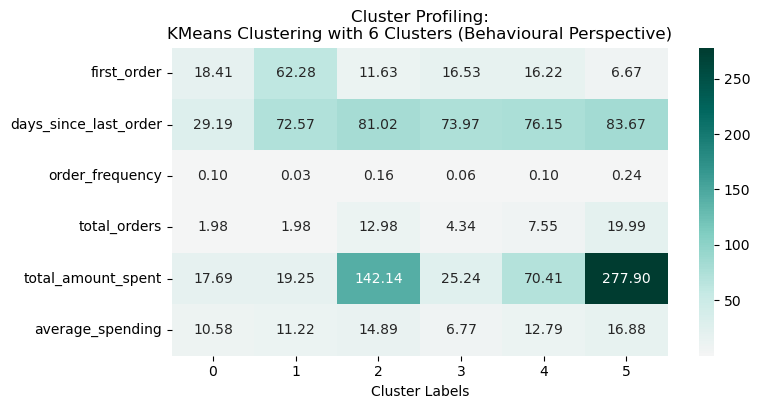

In [64]:
# add the cluster labels to the original data for profiling
df_with_labels_beh = df[behavioural_features].copy()
df_with_labels_beh['Cluster Labels'] = km_labels_beh

# compute the cluster profile
km_profile_beh = df_with_labels_beh.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_beh,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 6 Clusters (Behavioural Perspective)")
plt.show()

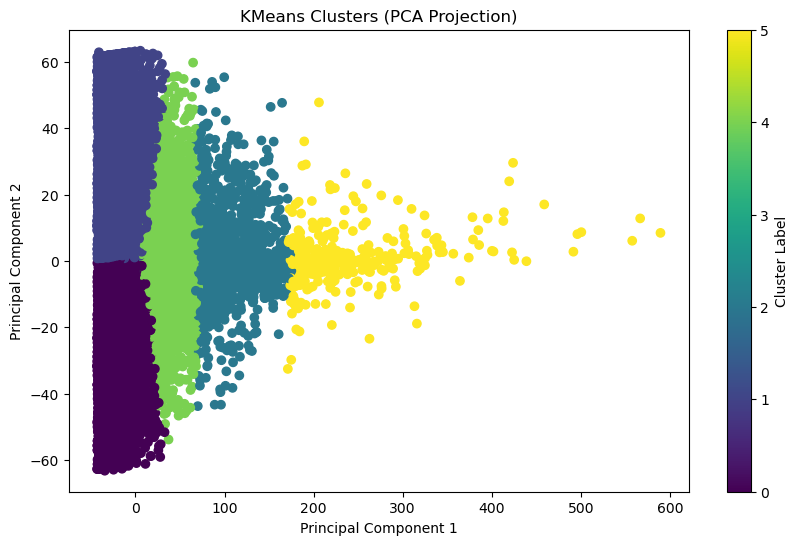

In [65]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[behavioural_features])

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=km_labels_beh, cmap='viridis', marker='o')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show a colorbar to indicate cluster colors
plt.colorbar(label='Cluster Label')
plt.show()

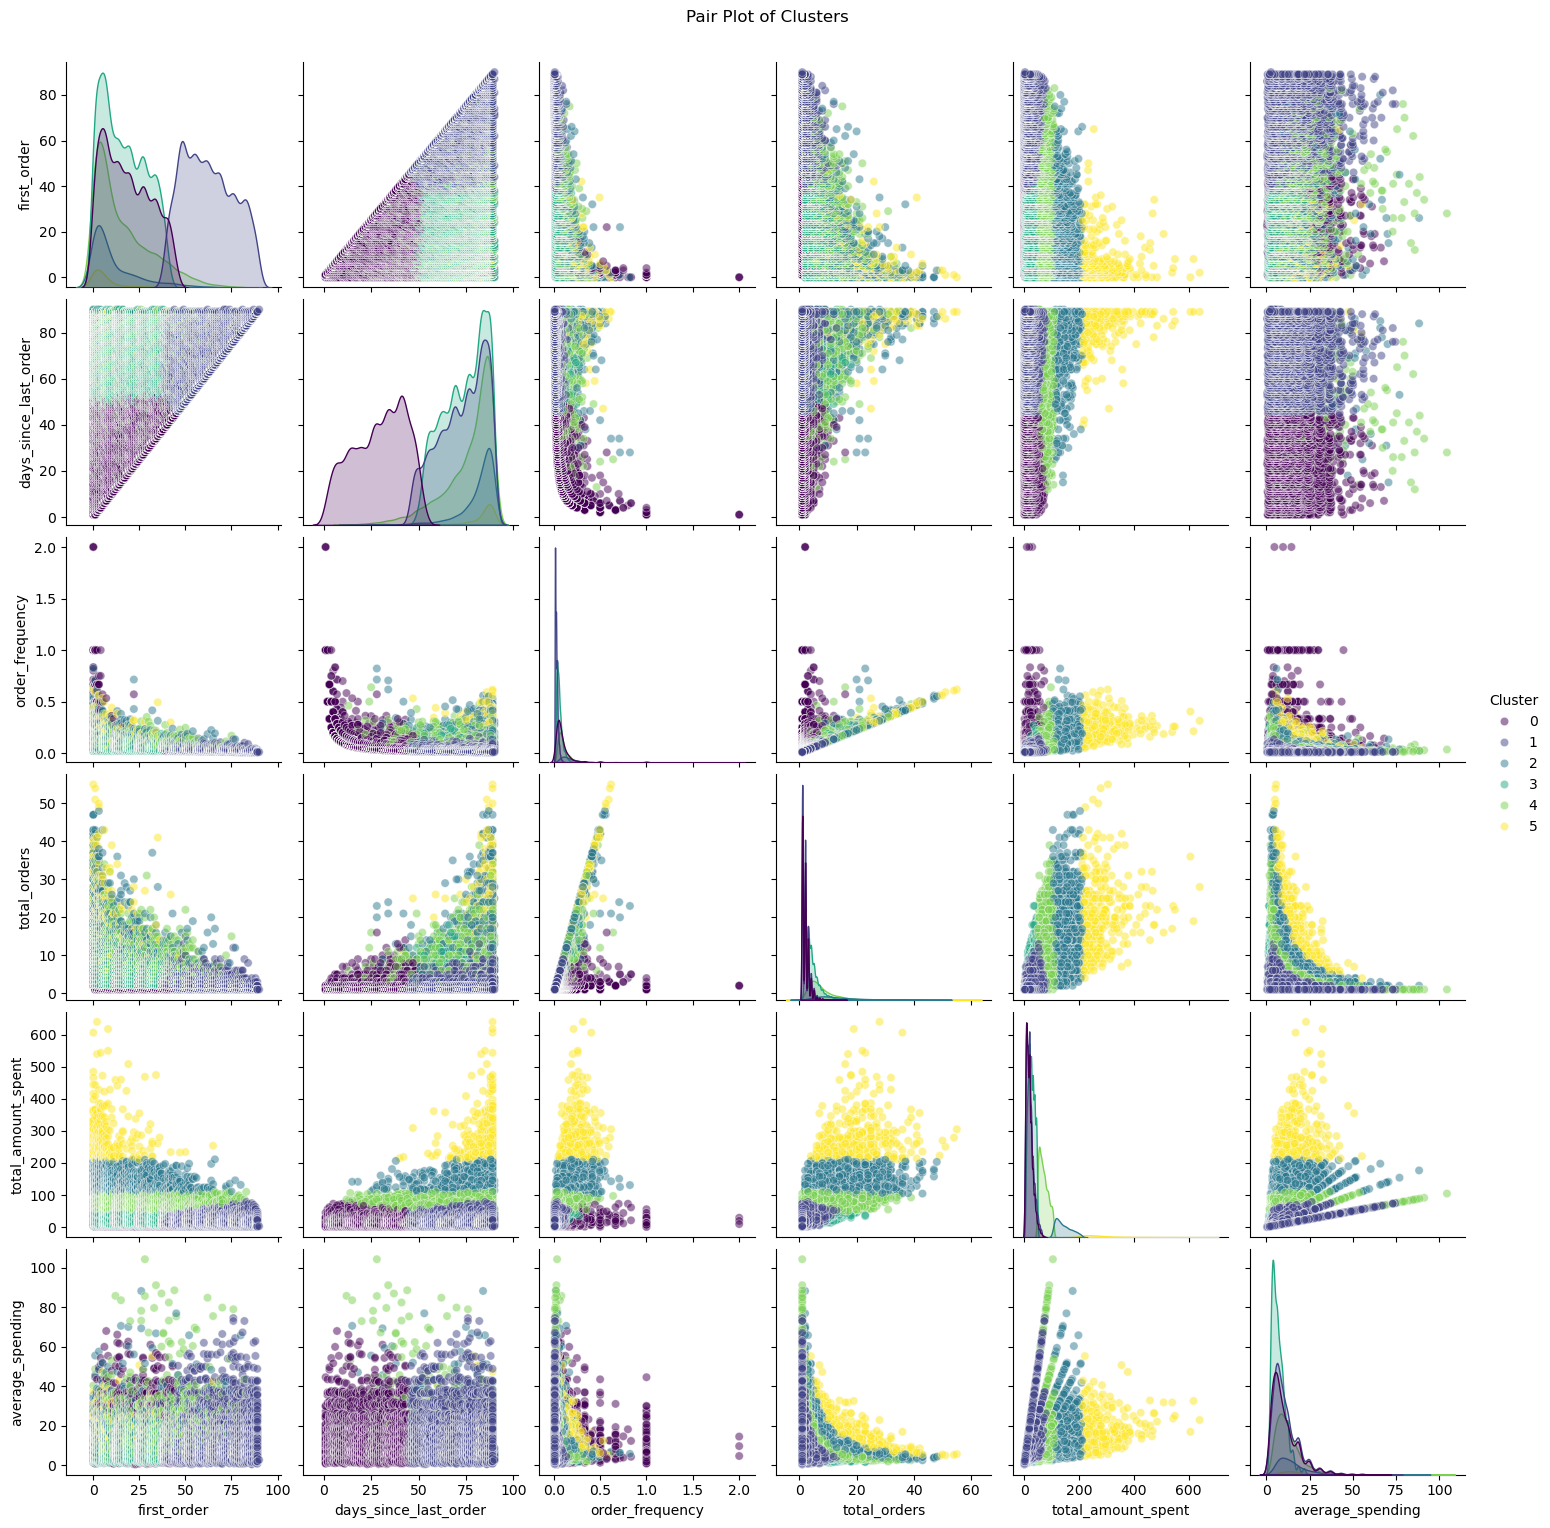

In [66]:
# add the cluster labels to the DataFrame
df['Cluster'] = km_labels_beh

# select a subset of features for the pair plot, including the cluster label
features_to_plot = behavioural_features[:6] 
features_to_plot.append('Cluster')

# create a DataFrame for plotting
plot_df = df[features_to_plot]

sns.pairplot(plot_df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

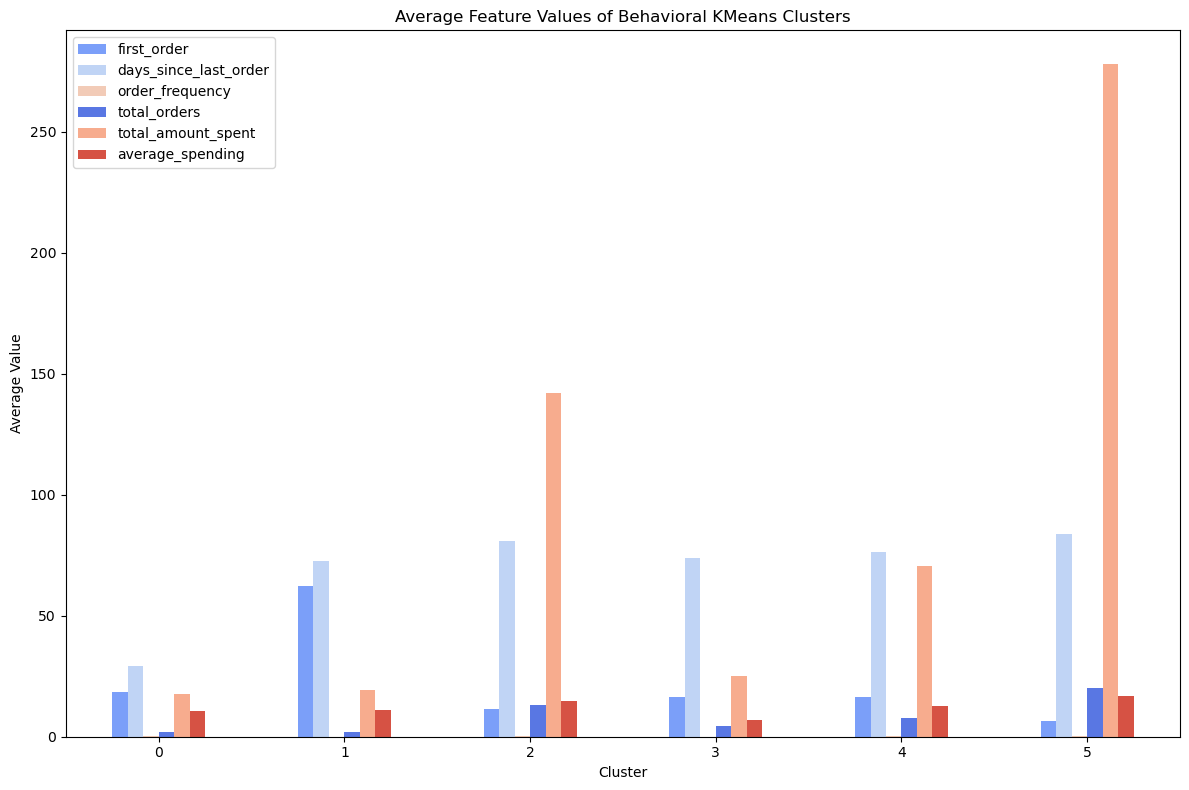

In [69]:
# add KMeans cluster labels to the DataFrame
df['km_labels_beh'] = km_labels_beh

# specify the features to plot
behavioural_features = ['first_order', 'days_since_last_order', 'order_frequency', 
                        'total_orders', 'total_amount_spent', 'average_spending']

# group by 'km_labels_beh' and compute the mean
cluster_means = df[behavioural_features + ['km_labels_beh']].groupby('km_labels_beh').mean()

# use coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.2)
days_since_last_order_color = cmap(0.4)
order_frequency_color = cmap(0.6)
total_orders_color = cmap(0.1)
total_amount_spent_color = cmap(0.7)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color, 
          total_orders_color, total_amount_spent_color, average_spending_color]

# plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Feature Values of Behavioral KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()